In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('data/df_train.csv')

In [3]:
df_train['delayTime'] = df_train['delayTime'].map(lambda x: eval(x))

In [4]:
df_train['delay_len'] = df_train['delayTime'].map(lambda x: len(x))

In [5]:
sum(df_train['delay_len'].values)/df_train.shape[0]

20.515687652432725

In [6]:
delayTime_len=[]
for rows in df_train.delayTime:
    delayTime_len.append(len(rows))

In [7]:
sum(delayTime_len)/len(delayTime_len)

20.515687652432725

In [8]:
df_test=pd.read_csv('data/df_test.csv')

In [9]:
df_test=df_test.drop(['Unnamed: 0'],axis=1)

<AxesSubplot:>

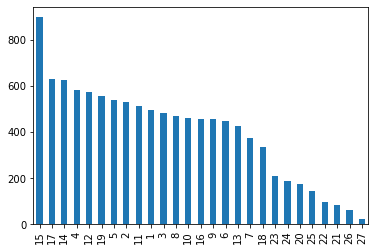

In [10]:
df_test.predict_len.value_counts()[1:].plot(kind='bar')

In [11]:
df_train.firstDelay.value_counts()

0.0     61015
1.0      3270
2.0      1964
3.0      1307
4.0       983
        ...  
97.0        1
75.0        1
44.0        1
95.0        1
78.0        1
Name: firstDelay, Length: 69, dtype: int64

In [12]:
i=0
delaytime=[]
for values in df_train.delayTime.values:
    for x in range(len(values)):
        if values[x]>9:
            values[x]=0
            break
    delaytime.append(values)
df_train.delayTime=delaytime

In [13]:
a=np.arange(15)
a[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
train_length=10
output_length=10
train_x=[]
train_y=[]
for values in df_train.delayTime.values:
    if len(values)>=(train_length+output_length):
        for i in range(len(values)-(train_length+output_length)+1):
            train_x.append(np.array(values[i:i+train_length]).reshape(1,-1))#输入
            train_y.append(np.array(values[i+train_length:i+train_length+output_length]).reshape(1,-1)) #真值

In [15]:
train_x[0].shape

(1, 10)

In [32]:
train_x=np.concatenate(train_x,axis=0)[:,np.newaxis][:100000]
train_y=np.concatenate(train_y,axis=0)[:100000]

In [33]:
train_x.shape

(100000, 1, 10)

In [34]:
train_y.shape

(100000, 10)

In [19]:
import tensorflow as tf
# 设置gpu内存自增长
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [20]:
import numpy as np
from keras import layers
import keras

In [36]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(1,10), dtype="float")
# Add 2 bidirectional LSTMs
x = layers.LSTM(128, return_sequences=True)(inputs)
x = layers.LSTM(128, return_sequences=True)(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128))(x)
# Add a classifier
outputs = layers.Dense(10, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1, 10)]           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 1, 128)            71168     
_________________________________________________________________
lstm_25 (LSTM)               (None, 1, 128)            131584    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 1, 256)            263168    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 1, 256)            394240    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 1, 256)            394240    
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 256)             

In [40]:
from sklearn.model_selection import train_test_split
model.compile("adam", loss='mean_squared_error')
X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.2)
EarlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1,\
                                            mode='auto', baseline=None, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_test, y_test),callbacks=[EarlyStopping])

Epoch 1/100
800/800 [==============================] - 9s 11ms/step - loss: 0.3617 - val_loss: 0.3456
Epoch 2/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3618 - val_loss: 0.3458
Epoch 3/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3620 - val_loss: 0.3457
Epoch 4/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3618 - val_loss: 0.3455
Epoch 5/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3616 - val_loss: 0.3455
Epoch 6/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3615 - val_loss: 0.3456
Epoch 7/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3616 - val_loss: 0.3454
Epoch 8/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3615 - val_loss: 0.3453
Epoch 9/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3614 - val_loss: 0.3451
Epoch 10/100
800/800 [==============================] - 7s 9ms/step - loss: 0.3614 - val_l

In [41]:
model.save_weights('model/Sequential_model.pkl')